In [1]:
from config_figures import *
from sklearn.preprocessing import scale
from statsmodels.multivariate.manova import MANOVA

In [2]:
biome_names = {
    'Boreal Forests/Taiga': 'Boreal Forests',
    'Mediterranean Forests, Woodlands & Scrub': 'Mediterranean Forests',
    'Temperate Broadleaf & Mixed Forests': 'Temperate Broadleaf Forests', 
    'Temperate Conifer Forests': 'Temperate Conifer Forests',
    'Tropical & Subtropical Coniferous Forests': 'Tropical Coniferous Forests',
    'Tropical & Subtropical Dry Broadleaf Forests': 'Tropical Dry Broadleaf Forests',
    'Tropical & Subtropical Moist Broadleaf Forests': 'Tropical Moist Broadleaf Forests'
}

# Spider plots

In [3]:
median_list = []
df_list = []
for biome in [3,1,2,6,5,4,12]:

    if biome == 1:
        df = pd.concat([pd.read_csv(google_drive_path + '/ecoregions_stats_v2_biome_' + str(biome) + '_chunk_' + str(i) + '_outof_5.csv') for i in range(5)])
    else:
        df = pd.read_csv(google_drive_path + '/ecoregions_stats_v2_biome_' + str(biome) + '.csv' )
        
    df['turnover'] = (1- ((df.n_present - df.n_lost) / (df.n_present + df.n_gained))) * 100 # (1 - Jaccard_index) * 100
    df['frac_gained'] = df['n_gained'] / df['n_present'] * 100
    df['frac_lost'] = df['n_lost'] / df['n_present'] * 100
    df['BIOME_NAME'] = df['BIOME_NAME'].apply(lambda b: biome_names[b])
    df = df.drop(['system:index','BIOME_NUM','ECO_ID','ECO_NAME','REALM','.geo'], axis=1)
    df_list.append(df)

    median_series = df.median(axis=0, numeric_only=True)
    median_series.name = df['BIOME_NAME'].iloc[0]
    median_list.append(median_series)

df_all = pd.concat(df_list)

df_median = pd.concat(median_list, axis=1).T
df_median

,abs_latitude_shift,elevation_shift,latitude_shift,n_future,n_gained,n_lost,n_present,pos_elevation_shift,turnover,frac_gained,frac_lost
Tropical Coniferous Forests,1.127862,34.687451,-0.027753,1309.0,40.0,77.0,1459.0,32.771066,12.108680,3.579728,8.000998
Tropical Moist Broadleaf Forests,1.268841,4.516270,-0.147381,762.5,26.0,42.5,819.5,12.431565,9.040614,2.746211,5.080493
Tropical Dry Broadleaf Forests,1.254672,4.447121,-0.234587,1032.0,27.5,177.0,1215.0,13.163033,16.129032,1.876513,14.180479
Boreal Forests,6.002923,-1.947184,6.002602,106.0,47.0,1.0,48.0,0.001464,46.076172,76.656437,1.049451
Temperate Conifer Forests,4.002123,31.409943,4.002123,273.0,51.0,11.0,210.0,31.821971,28.020566,27.303754,4.371585
Temperate Broadleaf Forests,3.632706,2.704764,3.499902,238.0,24.0,16.0,194.0,6.409561,19.519095,12.213740,7.309487
Mediterranean Forests,2.701168,-39.976610,2.435265,176.5,5.0,27.5,196.5,0.005449,19.067727,1.640778,11.704613


In [4]:
df_list = []
for biome in [3,1,2,6,5,4,12]:
    if biome == 1:
        df = pd.concat([pd.read_csv(google_drive_path + '/ecoregions_stats_v2_biome_' + str(biome) + '_chunk_' + str(i) + '_outof_5.csv') for i in range(5)])
    else:
        df = pd.read_csv(google_drive_path + '/ecoregions_stats_v2_biome_' + str(biome) + '.csv' )
        
    df['turnover'] = (1- ((df.n_present - df.n_lost) / (df.n_present + df.n_gained))) * 100 # (1 - Jaccard_index) * 100
    df['frac_gained'] = df['n_gained'] / df['n_present'] * 100
    df['frac_lost'] = df['n_lost'] / df['n_present'] * 100
    df['BIOME_NAME'] = df['BIOME_NAME'].apply(lambda b: biome_names[b])
    df = df.drop(['system:index','BIOME_NUM','ECO_ID','ECO_NAME','REALM','.geo'], axis=1)
    df_list.append(df)

df_ecoregions = pd.concat(df_list)
df_ecoregions

,BIOME_NAME,abs_latitude_shift,elevation_shift,latitude_shift,n_future,n_gained,n_lost,n_present,pos_elevation_shift,turnover,frac_gained,frac_lost
0,Tropical Coniferous Forests,1.480225,2.412819,1.146991,750,9,41,782,0.130527,6.321113,1.150895,5.242967
1,Tropical Coniferous Forests,1.486806,2.471130,1.371576,612,20,120,712,0.172047,19.125683,2.808989,16.853933
2,Tropical Coniferous Forests,1.012247,3.569928,-0.155856,534,40,28,522,0.067577,12.099644,7.662835,5.363985
3,Tropical Coniferous Forests,1.486365,2.197965,1.369144,650,35,65,680,0.176699,13.986014,5.147059,9.558824
4,Tropical Coniferous Forests,0.860494,72.217503,0.605677,451,113,78,416,72.217503,36.105860,27.163462,18.750000
...,...,...,...,...,...,...,...,...,...,...,...,...
35,Mediterranean Forests,0.854646,67.810005,0.601772,627,60,79,646,64.173247,19.688385,9.287926,12.229102
36,Mediterranean Forests,4.794860,-59.923142,4.876667,178,1,5,182,0.005799,3.278689,0.549451,2.747253
37,Mediterranean Forests,4.794860,-40.586703,4.686674,199,1,4,202,0.024178,2.463054,0.495050,1.980198
38,Mediterranean Forests,3.249024,-64.713594,3.041497,120,1,80,199,0.037075,40.500000,0.502513,40.201005


In [5]:
vars = ['n_present', 'frac_lost', 'frac_gained', 'abs_latitude_shift', 'elevation_shift']

In [6]:
# median per biome
df_median = df_ecoregions.groupby('BIOME_NAME')[vars].median()
# reorder biomes as they should appear in the figure
df_median = df_median.reindex([
    'Tropical Coniferous Forests', 'Tropical Moist Broadleaf Forests', 'Tropical Dry Broadleaf Forests', 
    'Boreal Forests', 'Temperate Conifer Forests', 'Temperate Broadleaf Forests', 'Mediterranean Forests'
])
df_median

,n_present,frac_lost,frac_gained,abs_latitude_shift,elevation_shift
BIOME_NAME,,,,,
Tropical Coniferous Forests,1459.0,8.000998,3.579728,1.127862,34.687451
Tropical Moist Broadleaf Forests,819.5,5.080493,2.746211,1.268841,4.516270
Tropical Dry Broadleaf Forests,1215.0,14.180479,1.876513,1.254672,4.447121
Boreal Forests,48.0,1.049451,76.656437,6.002923,-1.947184
Temperate Conifer Forests,210.0,4.371585,27.303754,4.002123,31.409943
Temperate Broadleaf Forests,194.0,7.309487,12.213740,3.632706,2.704764
Mediterranean Forests,196.5,11.704613,1.640778,2.701168,-39.976610


In [7]:
# min-max normalisation of median for figure construction
df_median_norm = (df_median - df_median.min()) / (df_median.max() - df_median.min())
df_median_norm

,n_present,frac_lost,frac_gained,abs_latitude_shift,elevation_shift
BIOME_NAME,,,,,
Tropical Coniferous Forests,1.000000,0.529399,0.025847,0.000000,1.000000
Tropical Moist Broadleaf Forests,0.546775,0.306986,0.014736,0.028919,0.595908
Tropical Dry Broadleaf Forests,0.827073,1.000000,0.003142,0.026012,0.594981
Boreal Forests,0.000000,0.000000,1.000000,1.000000,0.509340
Temperate Conifer Forests,0.114812,0.252999,0.342102,0.589585,0.956103
Temperate Broadleaf Forests,0.103473,0.476736,0.140943,0.513808,0.571645
Mediterranean Forests,0.105245,0.811449,0.000000,0.322725,0.000000


In [8]:
fig_vars = [*vars, vars[0]]
print(fig_vars)

fig_var_names = ['nb species', 'lost species', 'gained species', 'latitude shift', 'elevation shift']
fig_var_names = [*fig_var_names, fig_var_names[0]]
print(fig_var_names)

var_units = ['', '%', '%', '°', 'm']
var_units = [*var_units, var_units[0]]
print(var_units)

['n_present', 'frac_lost', 'frac_gained', 'abs_latitude_shift', 'elevation_shift', 'n_present']
['nb species', 'lost species', 'gained species', 'latitude shift', 'elevation shift', 'nb species']
['', '%', '%', '°', 'm', '']


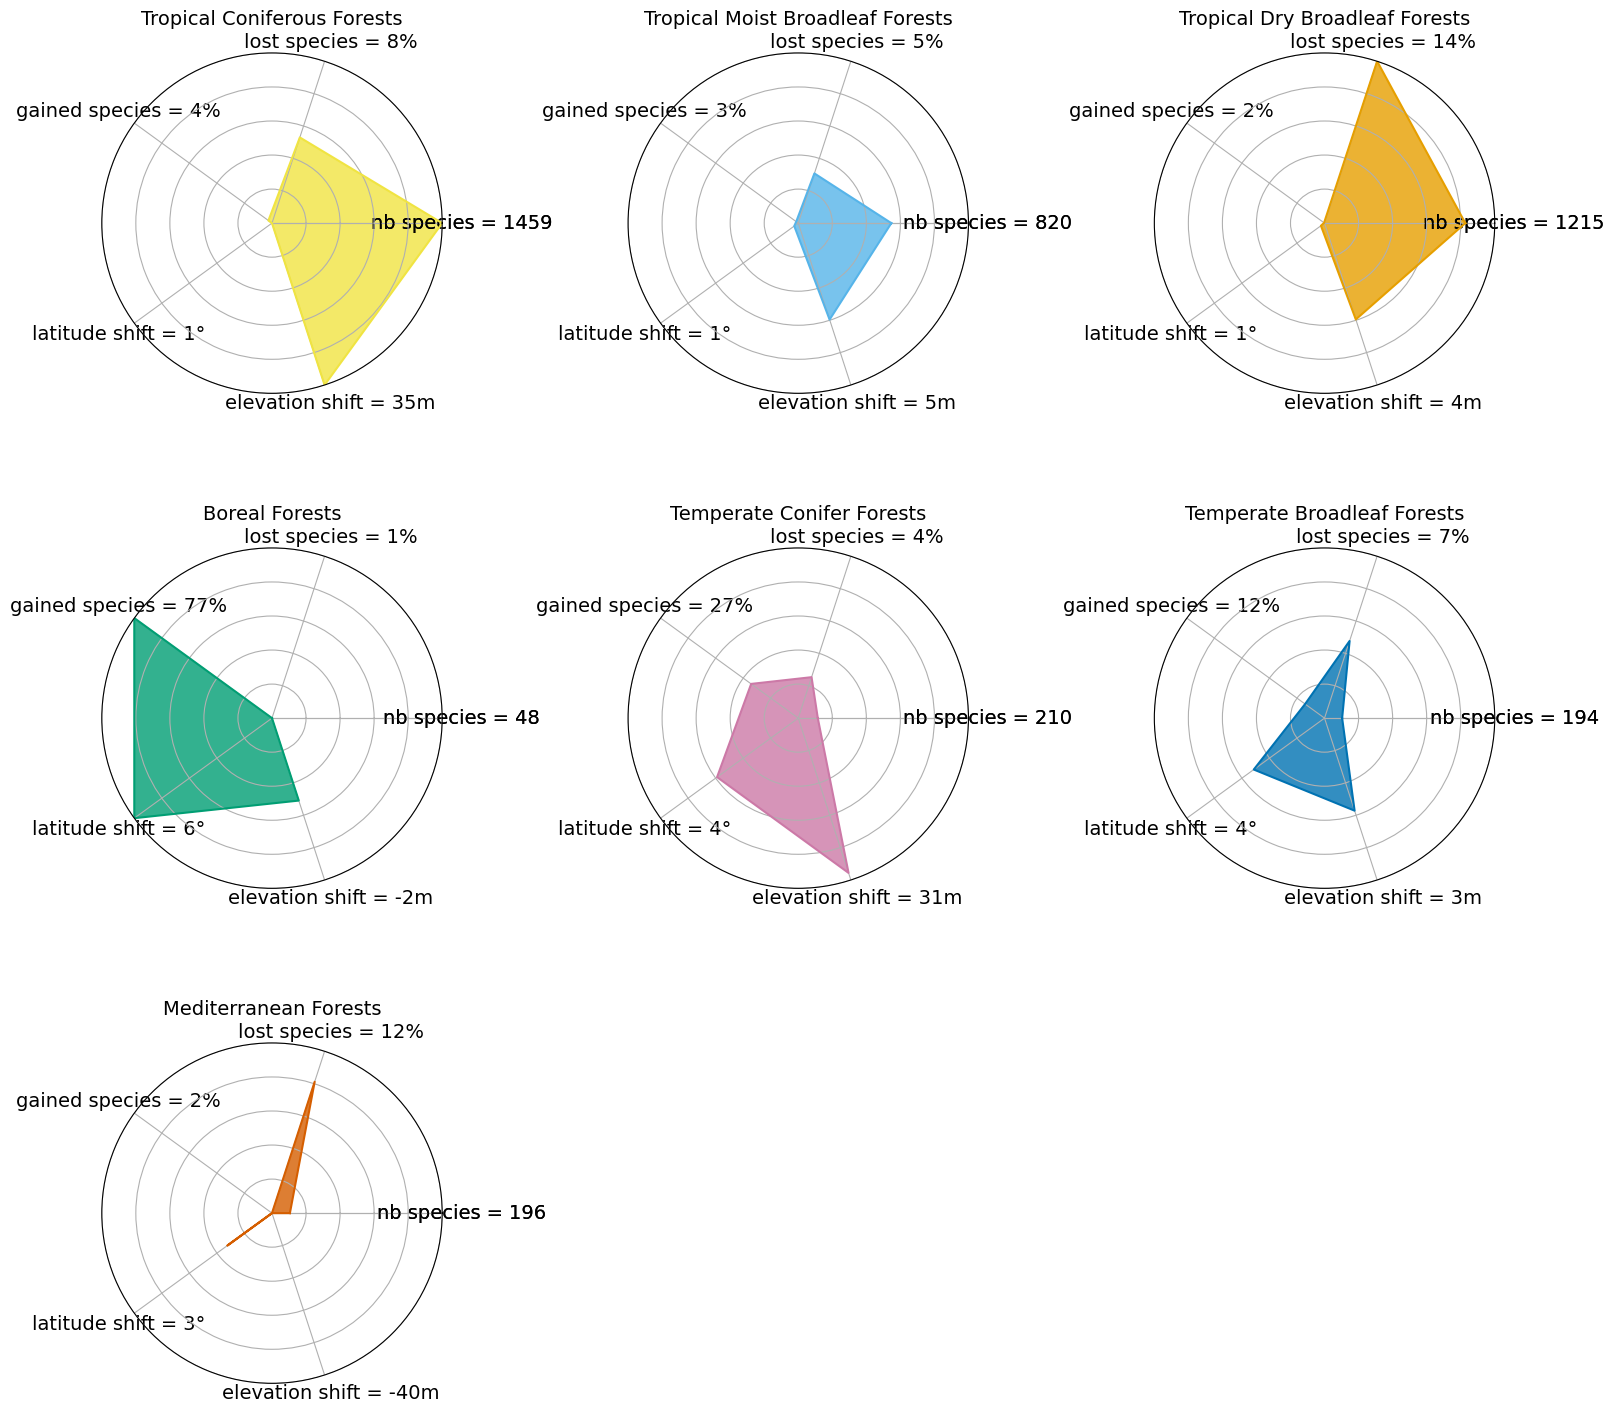

In [16]:
df_lines = [l for l in df_median_norm.iterrows()]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(fig_vars))
colors = ['#F0E442', '#56B4E9', '#E69F00', '#009E73', '#CC79A7', '#0072B2', '#D55E00']
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(16,15), subplot_kw=dict(projection='polar'))

for ax, df_line, color in zip(axs.flat[0:len(df_lines)], df_lines, colors):
    vals = list(df_line[1][fig_vars])

    ax.plot(label_loc, vals, label=df_line[0], c=color) 
    ax.fill(label_loc, vals, facecolor=color, alpha=0.8, label='_nolegend_')

    cat_labels = ["{} = {}{}".format(cn, round(df_median.loc[df_line[0], c]), cu) for c, cn, cu in zip(fig_vars, fig_var_names, var_units)]
    ax.set_thetagrids(np.degrees(label_loc), labels=cat_labels, fontsize = 14)
    
    ax.set_title(df_line[0], fontsize = 14)
    ax.set_ylim(0,1)
    ax.yaxis.set_ticklabels([])

for ax in axs.flat:
    if not bool(ax.has_data()): fig.delaxes(ax) ## delete if nothing is plotted in the axes obj

plt.tight_layout()
plt.savefig('../figures/climate_change_fig.png')

# Statistical analysis

In [11]:
# normalise such that each column has mean=0 and std=1 for further statistical analyses
df_norm = pd.DataFrame(scale(df_ecoregions[vars]), columns=vars)
df_norm['BIOME_NAME'] = df_ecoregions.loc[:,'BIOME_NAME'].values
df_norm

,n_present,frac_lost,frac_gained,abs_latitude_shift,elevation_shift,BIOME_NAME
0,-0.076496,-0.419624,-0.406343,-0.473954,-0.209978,Tropical Coniferous Forests
1,-0.155096,0.866058,-0.353623,-0.470000,-0.208248,Tropical Coniferous Forests
2,-0.368439,-0.406224,-0.199292,-0.755110,-0.175652,Tropical Coniferous Forests
3,-0.191028,0.058270,-0.279282,-0.470265,-0.216352,Tropical Coniferous Forests
4,-0.487462,1.076009,0.420744,-0.846282,1.860781,Tropical Coniferous Forests
...,...,...,...,...,...,...
492,-0.229205,0.353950,-0.147621,-0.849795,1.730033,Mediterranean Forests
493,-0.750210,-0.695975,-0.425466,1.517447,-2.059178,Mediterranean Forests
494,-0.727753,-0.780911,-0.427196,1.517447,-1.485561,Mediterranean Forests
495,-0.731121,3.451278,-0.426959,0.588724,-2.201287,Mediterranean Forests


In [26]:
df_ecoregions[['abs_latitude_shift', 'elevation_shift', 'frac_lost', 'frac_gained']].corr()

,abs_latitude_shift,elevation_shift,frac_lost,frac_gained
abs_latitude_shift,1.000000,-0.360979,0.026569,0.514873
elevation_shift,-0.360979,1.000000,-0.208692,-0.014384
frac_lost,0.026569,-0.208692,1.000000,-0.115512
frac_gained,0.514873,-0.014384,-0.115512,1.000000


In [24]:
manova_result = MANOVA.from_formula('abs_latitude_shift + elevation_shift + frac_lost + frac_gained ~ BIOME_NAME', df_ecoregions)
print(manova_result.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
         Intercept        Value  Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.2566 4.0000 483.0000 349.7529 0.0000
           Pillai's trace 0.7434 4.0000 483.0000 349.7529 0.0000
   Hotelling-Lawley trace 2.8965 4.0000 483.0000 349.7529 0.0000
      Roy's greatest root 2.8965 4.0000 483.0000 349.7529 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
       BIOME_NAME       Value   Num DF   Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.1608 24.0000 1686.1957  48.3706 0.0000
         Pillai's trace 1.2074 24.0000 1944.0

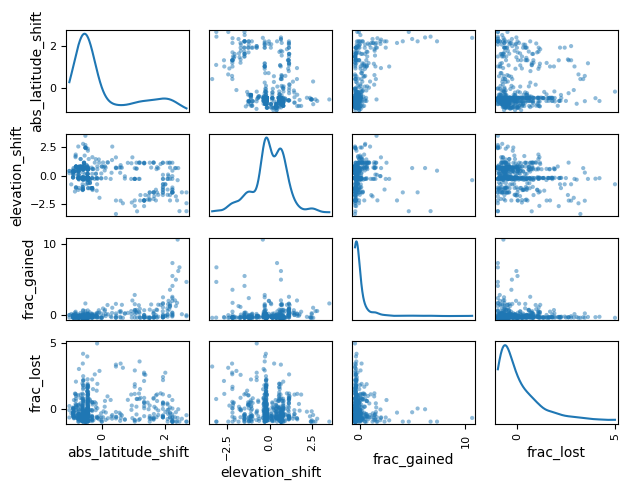

In [13]:
pd.plotting.scatter_matrix(df_norm[['abs_latitude_shift', 'elevation_shift', 'frac_gained', 'frac_lost']], diagonal="kde")
plt.tight_layout()
plt.show()

In [87]:
df_all[['abs_latitude_shift', 'elevation_shift', 'frac_gained', 'frac_lost']].corr()

,abs_latitude_shift,elevation_shift,frac_gained,frac_lost
abs_latitude_shift,1.000000,-0.360979,0.514873,0.026569
elevation_shift,-0.360979,1.000000,-0.014384,-0.208692
frac_gained,0.514873,-0.014384,1.000000,-0.115512
frac_lost,0.026569,-0.208692,-0.115512,1.000000


In [63]:
df_all[['BIOME_NAME', 'abs_latitude_shift', 'elevation_shift', 'frac_gained', 'frac_lost']]

,BIOME_NAME,abs_latitude_shift,elevation_shift,frac_gained,frac_lost
0,Tropical Coniferous Forests,1.480225,2.412819,1.150895,5.242967
1,Tropical Coniferous Forests,1.486806,2.471130,2.808989,16.853933
2,Tropical Coniferous Forests,1.012247,3.569928,7.662835,5.363985
3,Tropical Coniferous Forests,1.486365,2.197965,5.147059,9.558824
4,Tropical Coniferous Forests,0.860494,72.217503,27.163462,18.750000
...,...,...,...,...,...
35,Mediterranean Forests,0.854646,67.810005,9.287926,12.229102
36,Mediterranean Forests,4.794860,-59.923142,0.549451,2.747253
37,Mediterranean Forests,4.794860,-40.586703,0.495050,1.980198
38,Mediterranean Forests,3.249024,-64.713594,0.502513,40.201005


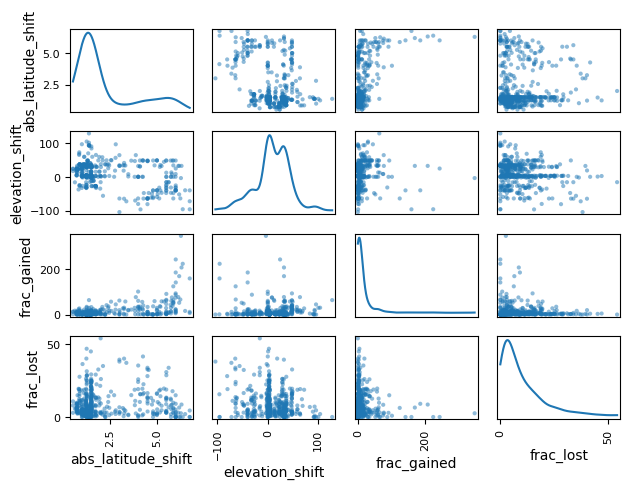

In [65]:
pd.plotting.scatter_matrix(df_all[['abs_latitude_shift', 'elevation_shift', 'frac_gained', 'frac_lost']], diagonal="kde")
plt.tight_layout()
plt.show()


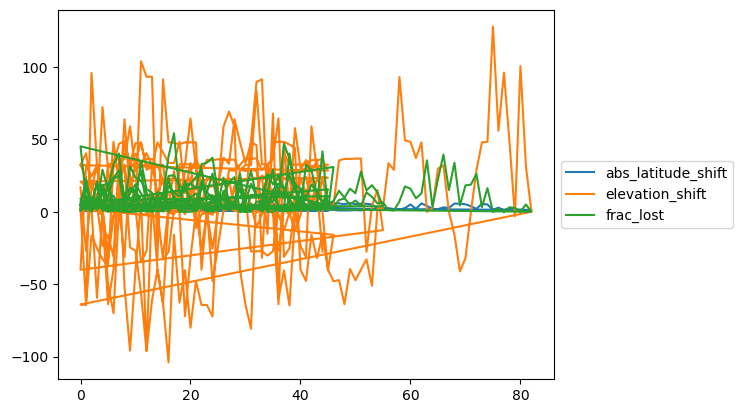

In [70]:
ax = df_all[['abs_latitude_shift', 'elevation_shift', 'frac_lost']].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [61]:
manova_result = MANOVA.from_formula('abs_latitude_shift + elevation_shift ~ BIOME_NAME', df_all)
print(manova_result.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.3260 2.0000 485.0000 501.2614 0.0000
          Pillai's trace 0.6740 2.0000 485.0000 501.2614 0.0000
  Hotelling-Lawley trace 2.0671 2.0000 485.0000 501.2614 0.0000
     Roy's greatest root 2.0671 2.0000 485.0000 501.2614 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
       BIOME_NAME       Value   Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.2805 12.0000 970.0000  71.7837 0.0000
         Pillai's trace 0.8257 12.0000 972.0000  56.9516 0.

In [35]:
import seaborn as sns

<AxesSubplot:xlabel='abs_latitude_shift', ylabel='BIOME_NAME'>

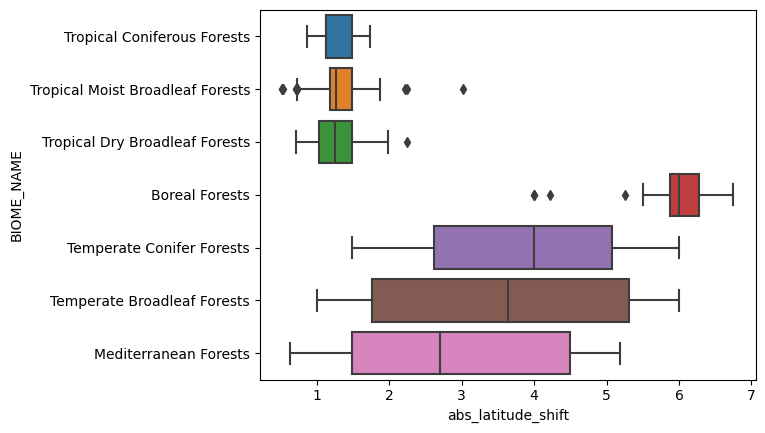

In [44]:
sns.boxplot(data=df_all, y='BIOME_NAME', x='abs_latitude_shift')

<AxesSubplot:xlabel='elevation_shift', ylabel='BIOME_NAME'>

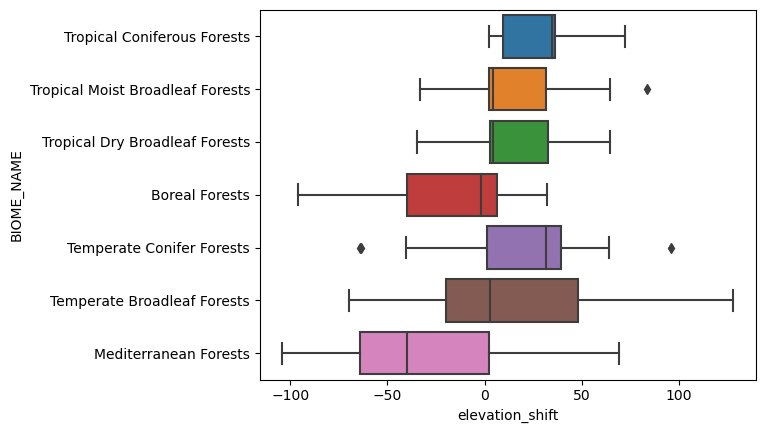

In [45]:
sns.boxplot(data=df_all, y='BIOME_NAME', x='elevation_shift')

<AxesSubplot:xlabel='n_present', ylabel='BIOME_NAME'>

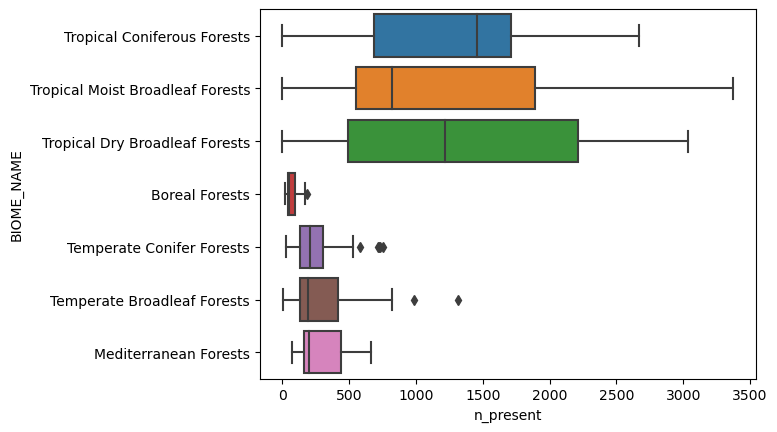

In [46]:
sns.boxplot(data=df_all, y='BIOME_NAME', x='n_present')

<AxesSubplot:xlabel='frac_gained', ylabel='BIOME_NAME'>

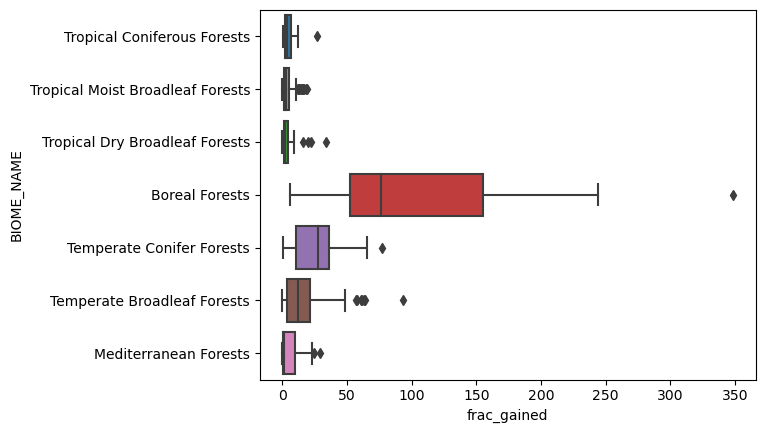

In [47]:
sns.boxplot(data=df_all, y='BIOME_NAME', x='frac_gained')

<AxesSubplot:xlabel='frac_lost', ylabel='BIOME_NAME'>

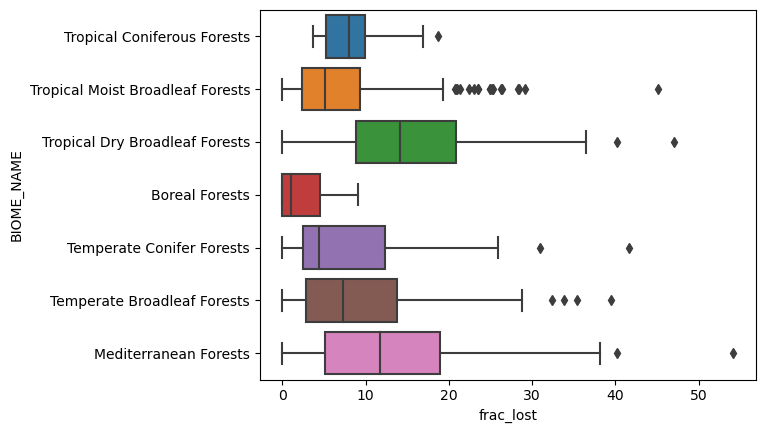

In [48]:
sns.boxplot(data=df_all, y='BIOME_NAME', x='frac_lost')

In [11]:
df_biome.iloc[0]['BIOME_NAME']

NameError: name 'df_biome' is not defined

15 0.13333333333333333
230 0.008695652173913044
56 0.03571428571428571
26 0.07692307692307693
47 0.0425531914893617
83 0.024096385542168676
40 0.05


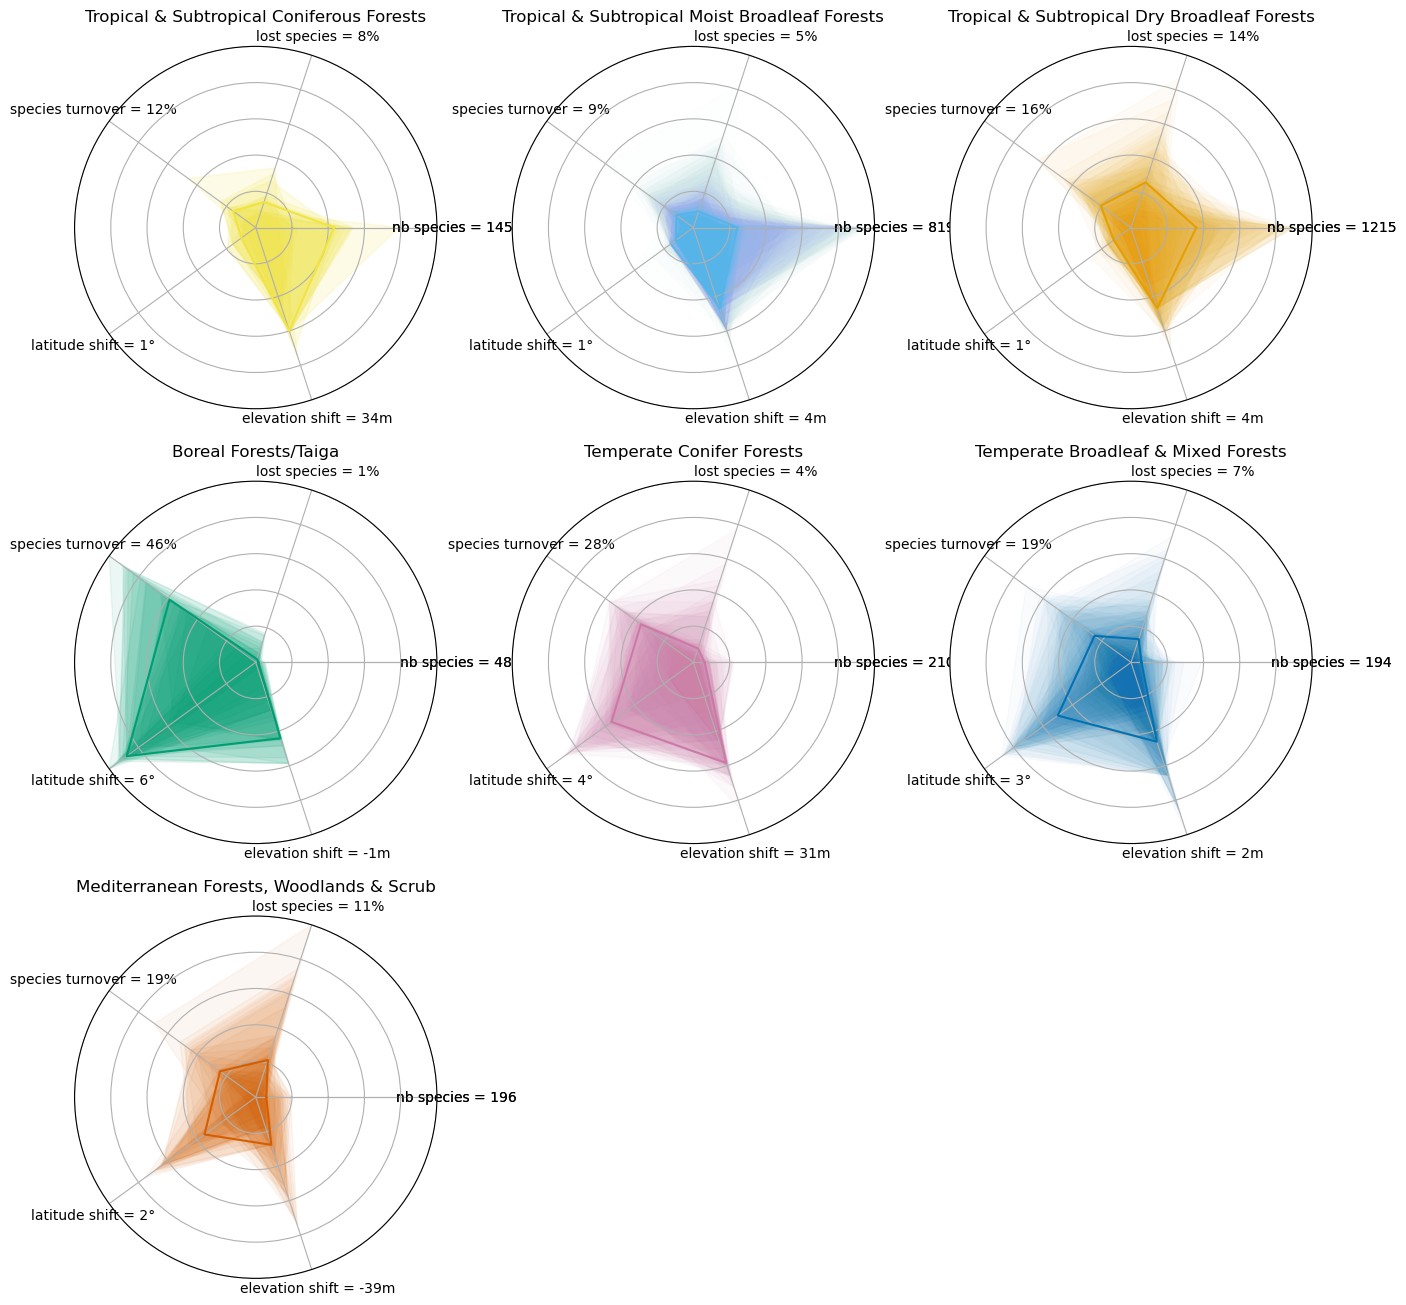

In [12]:
biomes = df_eco['BIOME_NUM'].unique().tolist()
colors = ['#F0E442', '#56B4E9', '#E69F00', '#009E73', '#CC79A7', '#0072B2', '#D55E00']
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(16,16), subplot_kw=dict(projection='polar'))

for ax, biome, color in zip(axs.flat[0:len(biomes)], biomes, colors):
    df_biome = df_eco[df_eco['BIOME_NUM']==biome]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(cats)+1)
    n_eco = df_biome.shape[0]
    print(n_eco, 2/n_eco)

    for l in df_biome.iterrows():
        vals = list(l[1][cats])
        vals = [*vals, vals[0]]
        ax.fill(label_loc, vals, alpha=2/n_eco, label='_nolegend_', color=color)

    biome_median_norm = df_biome[cats].median()
    biome_median_vals = [*biome_median_norm, biome_median_norm[0]]
    ax.plot(label_loc, biome_median_vals, label=df_line[0], color=color) 

    cat_labels = [f"{cn} = {int(df_biome[c].median())}{cu}" for c, cn, cu in  zip(categories, cat_names, cat_units)]
    cat_labels = [*cat_labels, cat_labels[0]]
    ax.set_thetagrids(np.degrees(label_loc), labels=cat_labels)

    ax.set_title(df_biome.iloc[0]['BIOME_NAME'])
    ax.set_ylim(0,1)
    ax.yaxis.set_ticklabels([])

for ax in axs.flat:
    if not bool(ax.has_data()): fig.delaxes(ax) # delete if nothing is plotted in the axes obj

plt.show()
